Following <https://scikit-learn.org/stable/modules/preprocessing.html>

In [1]:
from pathlib import Path
from sklearn import preprocessing
import pandas as pd

import numpy as np

housing = pd.read_csv(Path("work/data/000_housing.csv"))
X_df = pd.DataFrame({
  'X':  housing["housing_median_age"].copy()
}) 

X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])
{
  'min': X_train.min(axis=0),
  'mean': X_train.mean(axis=0),
  'max': X_train.max(axis=0),
  'std': X_train.std(axis=0)
}


{'min': array([ 0., -1., -1.]),
 'mean': array([1.        , 0.        , 0.33333333]),
 'max': array([2., 1., 2.]),
 'std': array([0.81649658, 0.81649658, 1.24721913])}

## Scallers

In [2]:
X_scaled = preprocessing.StandardScaler().fit_transform(X_train)
{
  'min': X_scaled.min(axis=0),
  'mean': X_scaled.mean(axis=0),
  'max': X_scaled.max(axis=0),
  'std': X_scaled.std(axis=0)
}


{'min': array([-1.22474487, -1.22474487, -1.06904497]),
 'mean': array([0., 0., 0.]),
 'max': array([1.22474487, 1.22474487, 1.33630621]),
 'std': array([1., 1., 1.])}

In [3]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(X_train)
{
  'min': X_scaled.min(axis=0),
  'mean': X_scaled.mean(axis=0),
  'max': X_scaled.max(axis=0),
  'std': X_scaled.std(axis=0)
}


{'min': array([0., 0., 0.]),
 'mean': array([0.5       , 0.5       , 0.44444444]),
 'max': array([1., 1., 1.]),
 'std': array([0.40824829, 0.40824829, 0.41573971])}

In [4]:
X_scaled = preprocessing.MaxAbsScaler().fit_transform(X_train)
{
  'min': X_scaled.min(axis=0),
  'mean': X_scaled.mean(axis=0),
  'max': X_scaled.max(axis=0),
  'std': X_scaled.std(axis=0)
}


{'min': array([ 0. , -1. , -0.5]),
 'mean': array([0.5       , 0.        , 0.16666667]),
 'max': array([1., 1., 1.]),
 'std': array([0.40824829, 0.81649658, 0.62360956])}

## QuantileTransformer

array([[<AxesSubplot: title={'center': 'X'}>]], dtype=object)

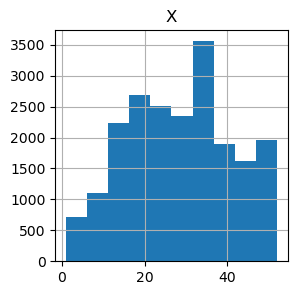

In [5]:
X_df.hist(figsize=(3,3))

In [6]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_df_out = quantile_transformer.fit_transform(X_df)
X_df_out

array([[0.82432432],
       [0.31931932],
       [1.        ],
       ...,
       [0.21671672],
       [0.24824825],
       [0.17967968]])

In [7]:
np.percentile(X_df_out, [0, 25, 50, 75, 100])

array([0.        , 0.24824825, 0.50850851, 0.75275275, 1.        ])

array([[<AxesSubplot: title={'center': 'X'}>]], dtype=object)

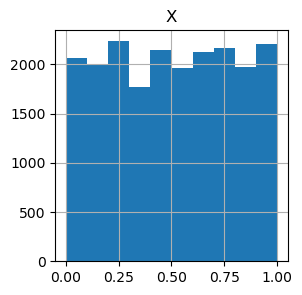

In [8]:
pd.DataFrame({
  'X': X_df_out.squeeze()
}).hist(figsize=(3,3))


## PowerTransformation

array([[<AxesSubplot: title={'center': 'Lognormal'}>]], dtype=object)

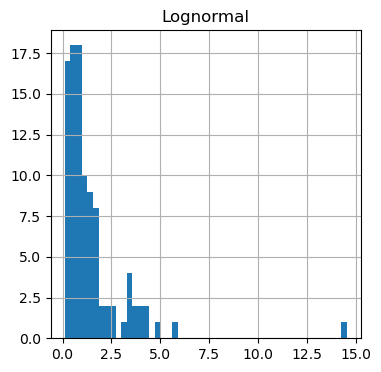

In [9]:
X = pd.DataFrame({
  'Lognormal': np.random.RandomState(616).lognormal(size=(100)) 
})
X.hist(bins=50, figsize=(4,4))

array([[<AxesSubplot: title={'center': 'Y'}>]], dtype=object)

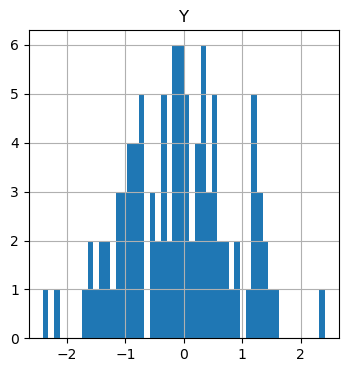

In [10]:
pd.DataFrame({
  'Y': preprocessing.PowerTransformer(method='box-cox', standardize=False).fit_transform(X).squeeze()
}).hist(bins=50, figsize=(4,4))

array([[<AxesSubplot: title={'center': 'Y'}>]], dtype=object)

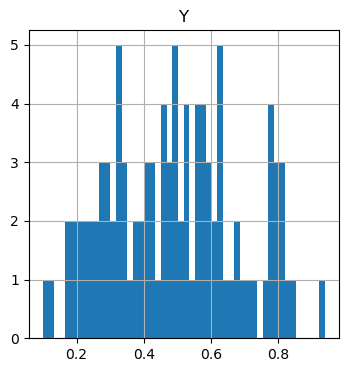

In [11]:
pd.DataFrame({
  'Y': preprocessing.PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(X).squeeze()
}).hist(bins=50, figsize=(4,4))

## Normalize

In [12]:
X = [[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]]
preprocessing.normalize(X, norm='l1')

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [13]:
preprocessing.normalize(X, norm='l2')

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

## Encoding

In [14]:
preprocessing.OrdinalEncoder().fit_transform([['male'], ['female'], [np.nan], ['female']])

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [15]:
enc = preprocessing.OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])
enc.fit_transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

## Discretization

In [16]:
X_df

,X
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
20635,25.0
20636,18.0
20637,17.0
20638,18.0


In [17]:
preprocessing.KBinsDiscretizer(n_bins=10, encode="ordinal", strategy='quantile').fit_transform(X_df)

array([[8.],
       [3.],
       [9.],
       ...,
       [2.],
       [2.],
       [1.]])

In [18]:
preprocessing.KBinsDiscretizer(n_bins=10, encode="ordinal", strategy='uniform').fit_transform(X_df)

array([[7.],
       [3.],
       [9.],
       ...,
       [3.],
       [3.],
       [2.]])

## Binarizer

In [19]:
preprocessing.Binarizer(threshold=1.1).fit_transform([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])